In [146]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [35]:
os.chdir("C:\Program Files\AIML PG")

In [86]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_data.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1011,1012,52,27,39,94304,2,0.7,2,166,0,0,0,1,0
4235,4236,27,1,91,92173,2,0.2,1,0,0,0,0,1,0
4475,4476,43,18,59,95039,3,0.8,3,91,0,0,0,1,0
1940,1941,57,33,55,92630,1,1.8,3,0,0,0,0,1,0
1756,1757,42,17,23,95053,2,0.0,3,0,0,0,0,0,0


In [37]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [87]:
#ID column is not required for analysis or learning purpose
bank_data.drop("ID",inplace = True,axis=1)

In [39]:
#descriptive stats of the data
bank_data.describe().transpose()

#conclusions drawn from descriptive stats
# 1. There are no blank or null values in the data.
# 2. Most of the fields are normally distributed except few outliers in few fields.
# 3. There is some incorrect data in "Experience" column's data , minimum value is shown as -3
# 4. Since experience in years can never be negative, data needs to be corrected before furthur analysis.

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [88]:
bank_data['Experience'][bank_data['Experience']<0].count()

52

In [89]:
#In order to correct the data, replace negative years with 0
exp_series = bank_data['Experience']
exp_series.mask(cond = exp_series<0,other=0,inplace=True)
bank_data.drop('Experience',inplace=True,axis=1)
bank_data.insert(loc=1,column='Experience',value=exp_series)
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


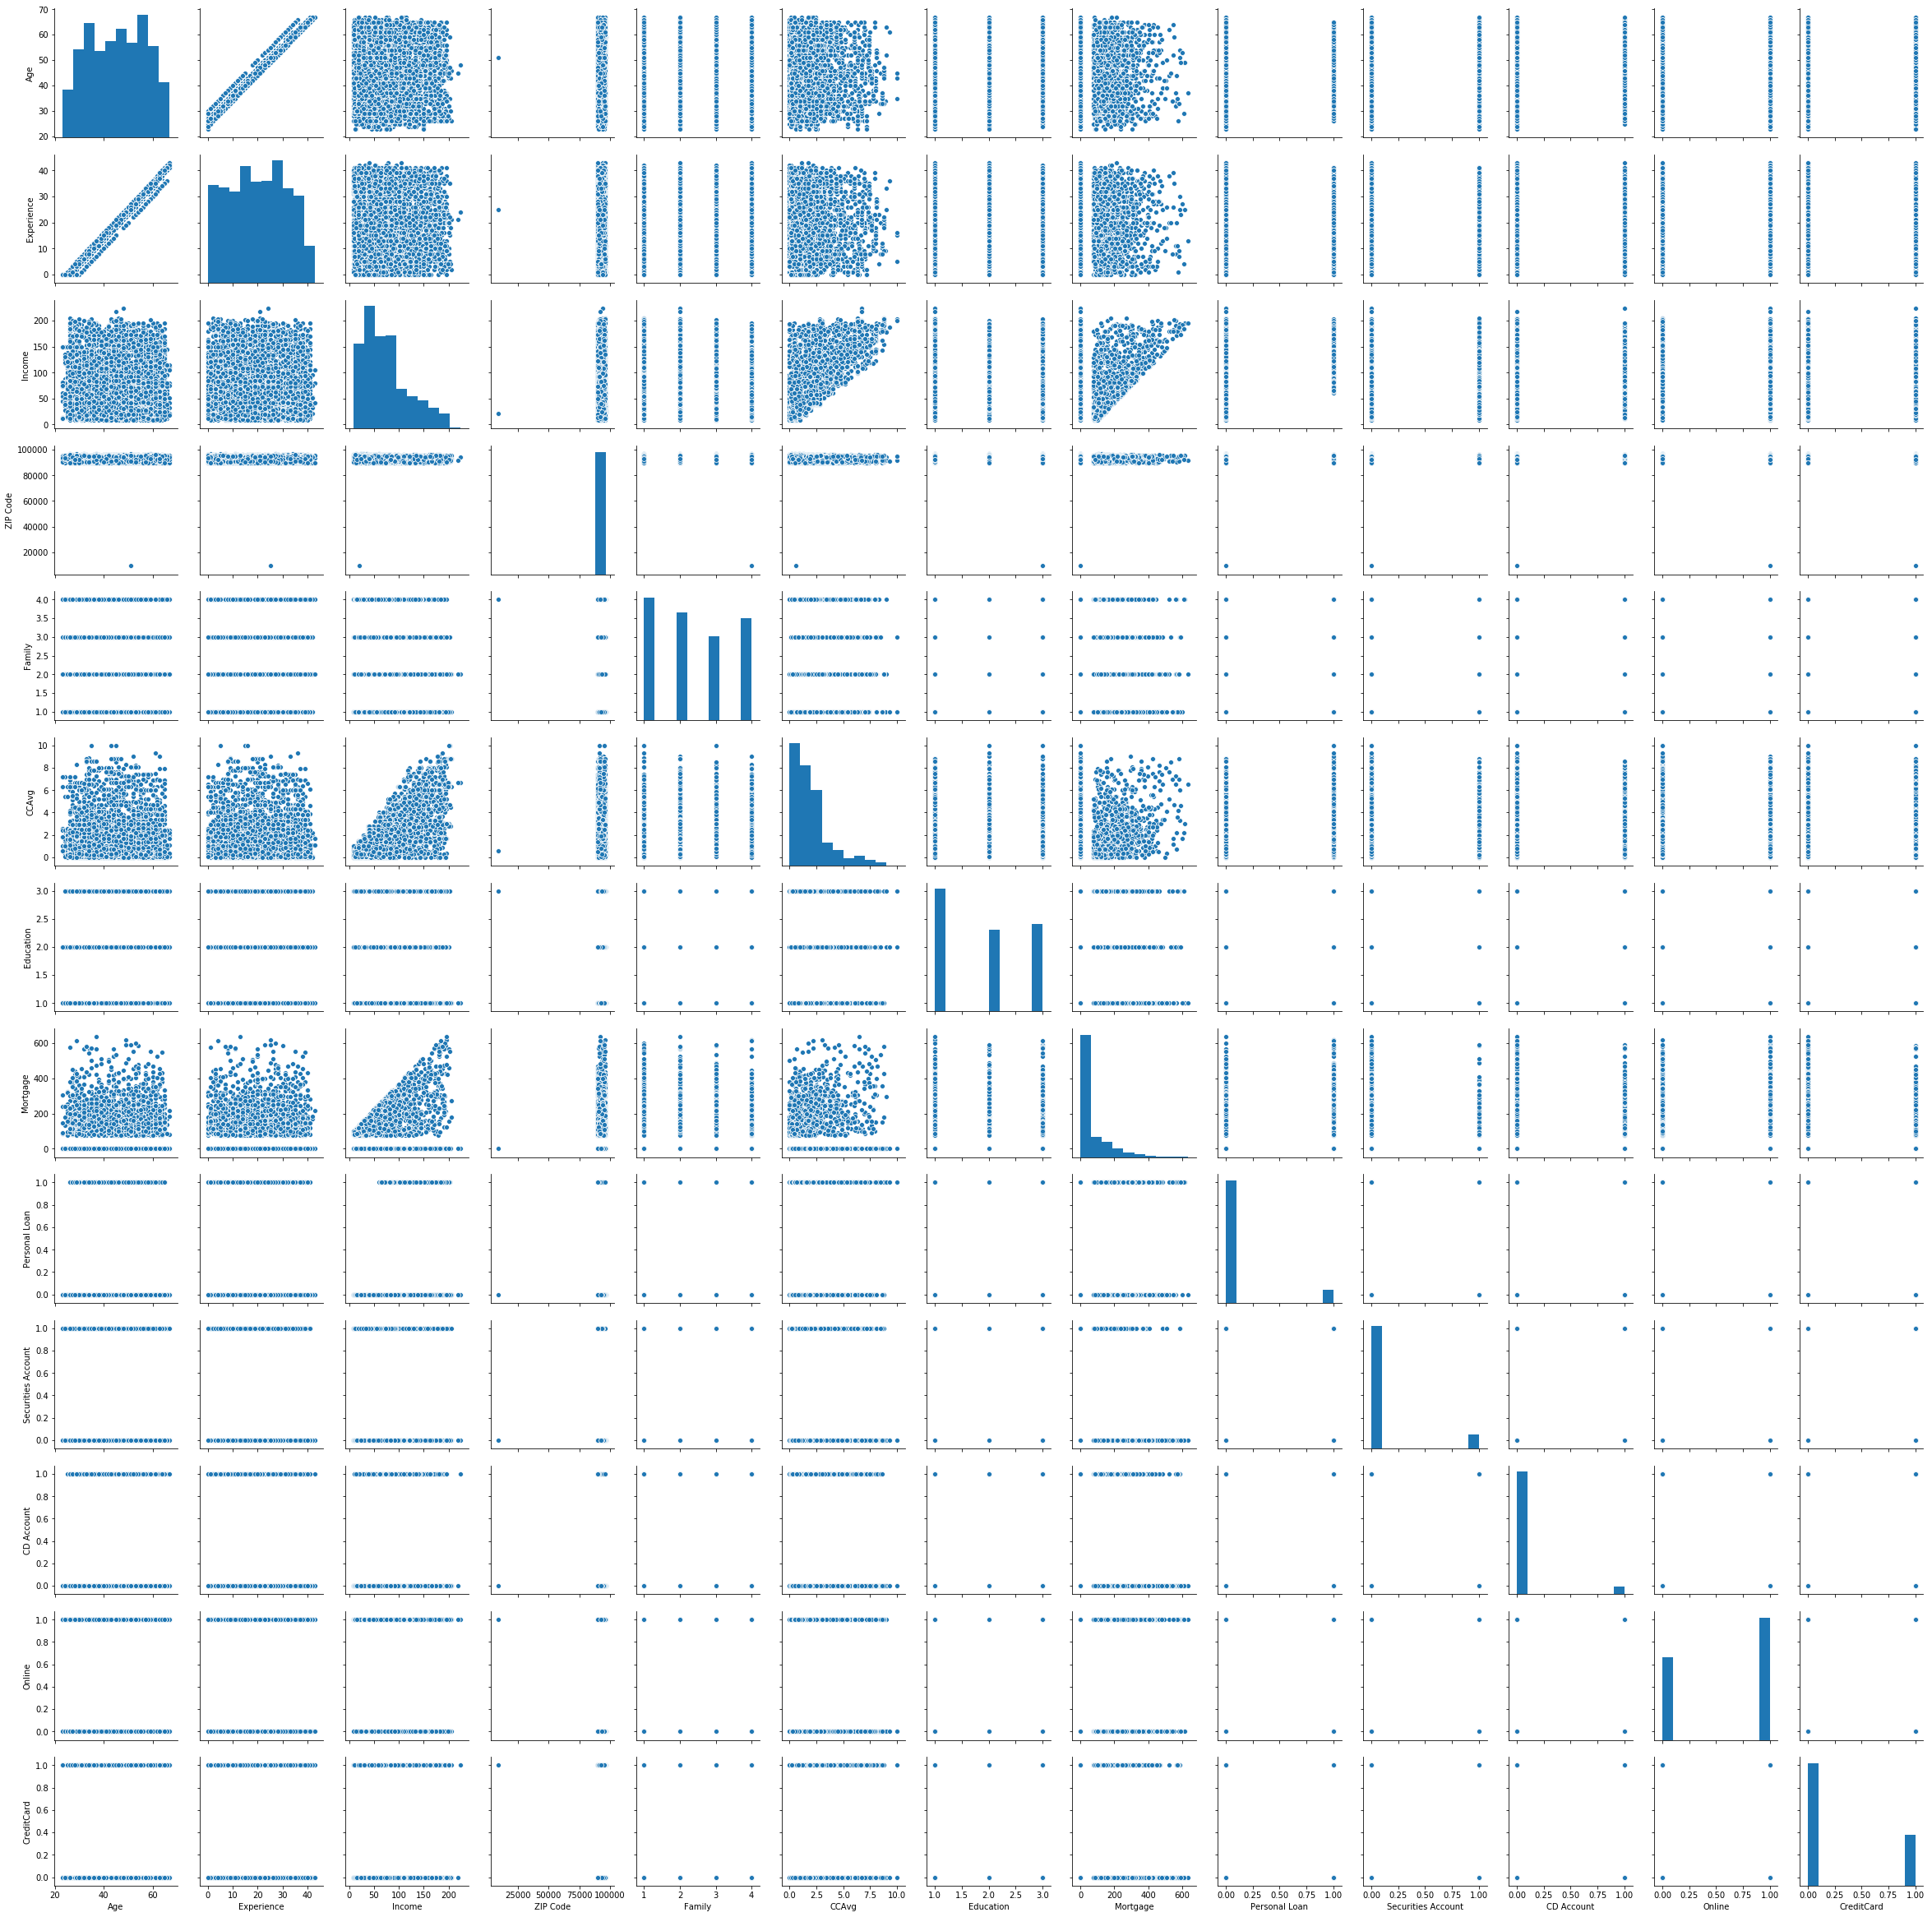

In [42]:
sb.pairplot(bank_data)

Observations :
1. Data in columns "Age" and "Experience" is uniformly distributed among all categories.
2. Data in "Income" column is not uniformly distributed,bank has more customers in lower income group as compared to higher income group.
   This indicates that bank could be a rural bank or in an area where lower income group people are more.
3. The "zip code" column has majority of people from a particular location this again shows that bank could be a small bank with less branches.
4. The column "Family" has uniform distribution in the data.
5. The column "CCAvg" distribution shows that average spending on credit card is less, as the people in rural areas are not much aware about credit cards.
6. The column "Education" distribution shows that there are more customers who are undergrad which is quite obvoius, however the advanced professional are 
   more than "Graduate" customers, this trend shows that more people who goes for higher studies applies for loans or are associated with bank.
7. "Mortgage" data shows that majority of customers has no mortgage, and few customers have very less mortgage value.
8. "Personal Loan" very few customers have taken personal loan offered by bank through its campaign.
9. The column data "Securities Account" shows that very few customers have securities account with the bank.This is an indication about risk taking ability
   of majority of customers.
10. The customers have "CD account" with the bank is very small.
11. More customers use "Internet banking" facilities of the bank, which is an indicative of good internet connectivity in the region,customer friendly application,
    Good level of education among population.
12. Less number of customers use credit card, which can mean that not much offers offered to the credit card users or people of the region do not spend much.

    

In [90]:
#from the obseravtions above, it can be concluded that ZIP code is not required for analysis.
bank_data.drop("ZIP Code",inplace=True,axis=1)
bank_data.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [91]:
train,test = train_test_split(bank_data,test_size=0.3,stratify=bank_data['Personal Loan'])
x_train = train.drop("Personal Loan",inplace=False,axis=1)
y_train = train["Personal Loan"]
x_test = test.drop("Personal Loan",inplace=False,axis=1)
y_test = test["Personal Loan"]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3500, 11) (3500,) (1500, 11) (1500,)


In [93]:
#Logistic regression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

C:\Users\tshrgpt329\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
logit_model.score(x_test,y_test)

0.9473333333333334

In [ ]:

scores=[]
for k in k_list:
    KNN_model.set_params(n_neighbors=k)
    KNN_model.fit(x_train,y_train)
    scores.append(accuracy_score(x_test,KNN_model.predict(x_test)))

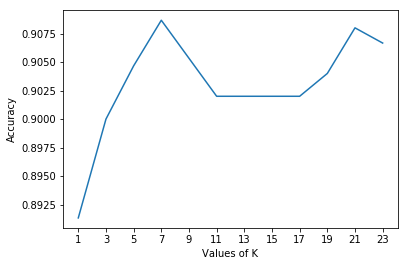

In [137]:
#K-nearest neighbors
k_list = [x for x in range(1,25,2)]
scores=[]
for k in k_list:
    KNN_model = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    KNN_model.fit(x_train,y_train)
    scores.append(accuracy_score(y_test,KNN_model.predict(x_test)))

plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.plot(k_list,scores)

In [138]:
#from the above graph maximum accuracy is observed at K=7
KNN_model.set_params(n_neighbors=7)
KNN_model.fit(x_train,y_train)
accuracy_score(y_test,KNN_model.predict(x_test))

0.9086666666666666

In [140]:
#Naive bais
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)
naive_model.score(x_test,y_test)

0.884

In [145]:
print('Confusion matrix for logistic regression')
print(confusion_matrix(y_test,logit_model.predict(x_test)))
print('')
print('Confusion matrix for KNN with k=7')
print(confusion_matrix(y_test,KNN_model.predict(x_test)))
print('')
print('Confusion matrix for Naive bias model')
print(confusion_matrix(y_test,naive_model.predict(x_test)))

Confusion matrix for logistic regression
[[1334   22]
 [  57   87]]

Confusion matrix for KNN with k=7
[[1305   51]
 [  86   58]]

Confusion matrix for Naive bias model
[[1235  121]
 [  53   91]]


In [147]:
print('Recall score for logistic regression')
print(recall_score(y_test,logit_model.predict(x_test)))
print('')
print('Recall score for KNN with k=7')
print(recall_score(y_test,KNN_model.predict(x_test)))
print('')
print('Recall score for Naive bias model')
print(recall_score(y_test,naive_model.predict(x_test)))

Recall score for logistic regression
0.6041666666666666

Recall score for KNN with k=7
0.4027777777777778

Recall score for Naive bias model
0.6319444444444444


Conclusion : In this application the desirable component is to predict potential customers which can take loan from bank.
Bank would not like to loose any potential customer here,even though for this bank has to approach a non potential customer.
Hence, the best model should have highest true positives and lowest false negatives,in other words the given model should have
high recall score.
Hence it is concluded that the best model to use here is naive bias.Although it has low accuracy score but it has high recall score.

In [ ]:
#Ans - Best model among three is Naive Bias as explained above